# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
url = 'https://aisgaiap.blob.core.windows.net/aiap4-assessment/real_estate.csv'
df = pd.read_csv(url)

print(df.shape)
df.head()

(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The column for index number (No) is not necessary, thus removed from the dataframe. Column names had also been change to facilitate subsequent operations. It is unclear how the transaction date was recorded, and what is the format, thus only the Year of transaction was kept.

In [3]:
df = df.drop(['No'],axis=1)
df.columns = ['trans_date','house_age','dist_to_mrt','num_conv','latitude','longtidue','price_per_unit']
df.trans_date = df.trans_date.astype(int)
df.head()

,trans_date,house_age,dist_to_mrt,num_conv,latitude,longtidue,price_per_unit
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


# Summary of variables in dataset

The dataset contains 414 transactions from the year 2012 (126 transactions) to 2013 (288 transactions). <br>
The oldest house sold was 43.8 years, and the newest house was brand new (0 years). The average house age was 17.712 years. The houses can be group into two populations: >25 years and <25 years. Majority of the houses are <25 years.<br>
Most of the houses were within 500m from the nearest MRT station (50th percentile = 492m). The furthest house from the MRT station was around 6.5km  away from the MRT station, while the nearest house form the MRT station was only 23m from the nearest MRT station.<br>
Number of convenience stores nearby the houses varies, with an average of 4 stores. Most of the houses have at least one convenience stores nearby. <br>
The average price per unit area of the house was 379000NTD/Ping, the cheapest house was 76000NTD/Ping, while the most expensive house was 1175000NTD/Ping. 

Summary
        house_age  dist_to_mrt    num_conv  price_per_unit
count  414.000000   414.000000  414.000000      414.000000
mean    17.712560  1083.885689    4.094203       37.980193
std     11.392485  1262.109595    2.945562       13.606488
min      0.000000    23.382840    0.000000        7.600000
25%      9.025000   289.324800    1.000000       27.700000
50%     16.100000   492.231300    4.000000       38.450000
75%     28.150000  1454.279000    6.000000       46.600000
max     43.800000  6488.021000   10.000000      117.500000


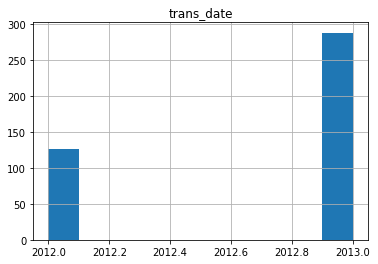

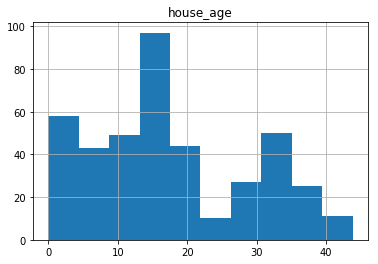

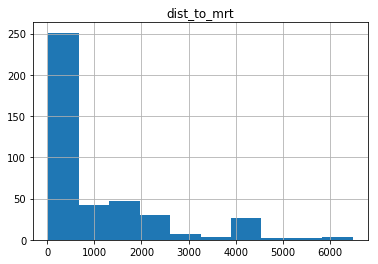

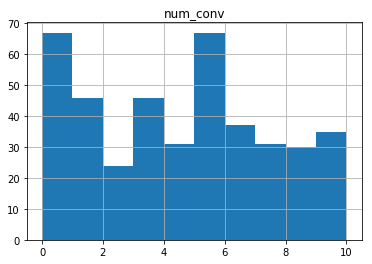

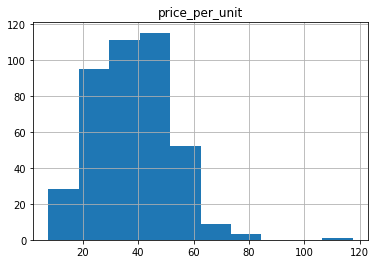

In [4]:
tf = df.drop(['trans_date','latitude','longtidue'],axis=1)
print('Summary')
print(tf.describe())

tf = df.drop(['latitude','longtidue'],axis=1)
for i, column in enumerate(tf.columns):
    plt.figure()
    tf[column].hist()
    plt.title(column)

# Correlation of variables with price

The correlation coefficient between the price and the respective factors was calculated to investigate the effect of individual factors on the price.<br>
The price negatively correlated with the house age and distance to the nearest MRT station. While the price positively correlated with the number of convenience stores nearby. <br>
These results make sense, as the older houses might be less appealing to buyers, thus resulting in lower price. <br>
Houses closer to the MRT station are more convenient, thus resulting in a higher price. It is worth to note that the effect of distance to the nearest MRT diminished with increasing distance. Near the MRT station, increasing distance caused the price to fall drastically. However, the further away from the MRT station, the fall in price due to increasing distance started to decrease. <br>
Surprisingly, the number of nearby convenience stores influenced the price positively. 


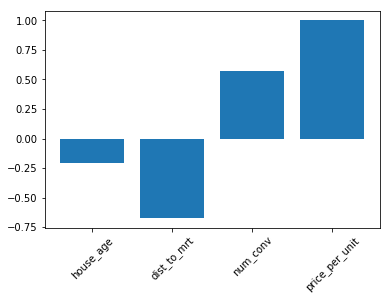

Correlation coefficient with price per unit area
house_age        -0.210567
dist_to_mrt      -0.673613
num_conv          0.571005
price_per_unit    1.000000
Name: price_per_unit, dtype: float64


<Figure size 432x288 with 0 Axes>

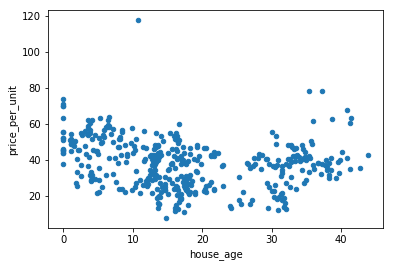

<Figure size 432x288 with 0 Axes>

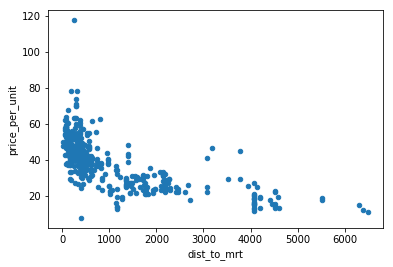

<Figure size 432x288 with 0 Axes>

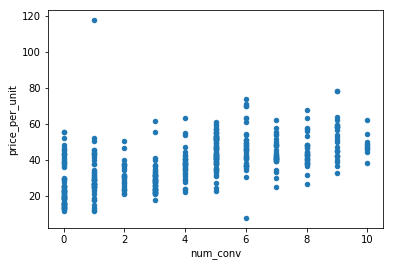

<Figure size 432x288 with 0 Axes>

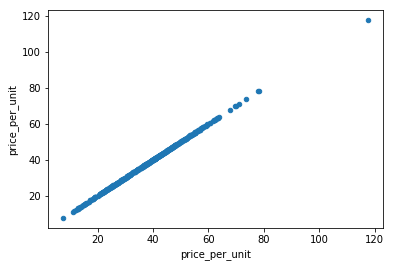

In [5]:
tf = df.drop(['trans_date','latitude','longtidue'],axis=1)
corr = tf.corr()['price_per_unit']
plt.bar(tf.columns,corr)
plt.xticks(rotation=45)
plt.show()
print('Correlation coefficient with price per unit area')
print(corr)

for i, column in enumerate(tf.columns):
    plt.figure()
    tf.plot.scatter(x= column,
                    y= 'price_per_unit')

# Analysis by year of transaction

The dataset contains transaction details for the year 2012 and 2013. The average price per unit area increased marginally from 363000NTD/Ping to 387000NTD/Ping. Other factors also remained relatively constant.

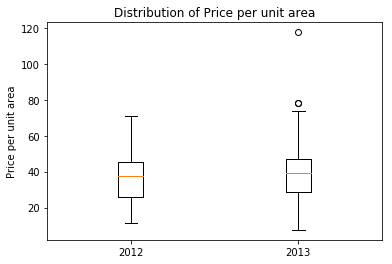

Statistic for year  2012
        house_age  dist_to_mrt    num_conv  price_per_unit
count  126.000000   126.000000  126.000000      126.000000
mean    16.866667  1052.404169    4.119048       36.304762
std     11.589022  1255.002992    3.005614       12.484915
min      0.000000    23.382840    0.000000       11.600000
25%      7.275000   209.154700    1.000000       25.975000
50%     15.450000   491.056700    4.000000       37.600000
75%     28.825000  1453.670000    6.750000       45.375000
max     40.900000  6306.153000   10.000000       71.000000
Statistic for year  2013
        house_age  dist_to_mrt    num_conv  price_per_unit
count  288.000000   288.000000  288.000000      288.000000
mean    18.082639  1097.658854    4.083333       38.713194
std     11.305845  1267.137088    2.924128       14.026954
min      0.000000    49.661050    0.000000        7.600000
25%      9.975000   292.997800    1.000000       28.700000
50%     16.400000   492.944150    4.000000       39.050000
75%   

In [6]:
uni_trans = df.trans_date.unique()
trans_data = []
trans_date_price = []
for i, year in enumerate(uni_trans):
    year_data = df[df['trans_date'] == year]
    trans_data.append(year_data)
    trans_date_price.append(year_data['price_per_unit'])
idx = range(1,uni_trans.shape[0]+1,1)
plt.boxplot(trans_date_price)
plt.title('Distribution of Price per unit area')
plt.ylabel('Price per unit area')
plt.xticks(idx,uni_trans)
plt.show()

for i in range(len(trans_data)):
    tf = trans_data[i]
    tf = tf.drop(['trans_date','latitude','longtidue'],axis=1)
    print('Statistic for year ', uni_trans[i])
    print(tf.describe())

# Analysis by location

Plotting the housing price according to location showed that the houses with a higher price were clustered in a region, which corresponds to the district centre of the Xindian district. The Songshan-Xindian Line (indicated as black line) serves this region with five stations (Dapinglin station, Qizhang station, Xindian District Office station, Xindian station, and Xiaobitan station). Hence, all houses in this area are within 1km from the nearest MRT station. This region was also served by many convenience stores, most houses in this region have at least five convenience stores nearby. Given that this region is the district centre, it is not surprising that the house around this area is older, but there are some relatively newer development in this area as well. <br>
House outside of this region are generally cheaper, and served by fewer convenience stores.


Text(0.5, 1.0, 'House Age')

<Figure size 432x288 with 0 Axes>

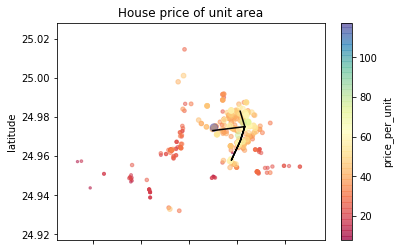

<Figure size 432x288 with 0 Axes>

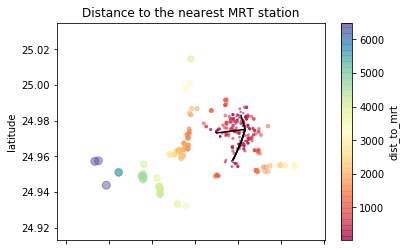

<Figure size 432x288 with 0 Axes>

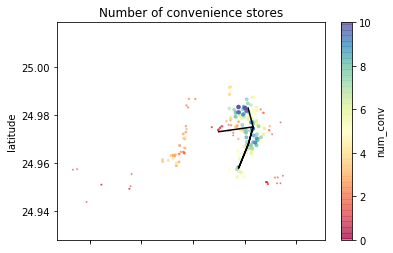

<Figure size 432x288 with 0 Axes>

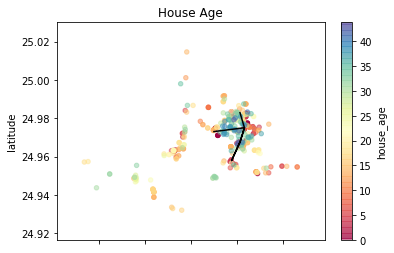

In [23]:
MRT_long = [121.541362,121.543296,121.541429,121.537711,121.541429,121.543296,121.529987]
MRT_lat = [24.982939,24.975073,24.967842,24.95797,24.967842,24.975073,24.973065]

df = df.sort_values(by=['price_per_unit'],ascending=True)
plt.figure()
df.plot.scatter(x = 'longtidue',
                y = 'latitude',
                s = df['price_per_unit']/2,
                c = 'price_per_unit',
                alpha = 0.5,
                cmap='Spectral')
plt.plot(MRT_long,MRT_lat, 'k-')
plt.title('House price of unit area')


df = df.sort_values(by=['dist_to_mrt'],ascending=True)
plt.figure()
df.plot.scatter(x = 'longtidue',
                y = 'latitude',
                s = df['dist_to_mrt']/100,
                c = 'dist_to_mrt',
                alpha = 0.5,
                cmap='Spectral')
plt.plot(MRT_long,MRT_lat, 'k-')
plt.title('Distance to the nearest MRT station')

df = df.sort_values(by=['num_conv'],ascending=True)
plt.figure()
df.plot.scatter(x = 'longtidue',
                y = 'latitude',
                s = df['num_conv'],
                c = 'num_conv',
                alpha = 0.5,
                cmap='Spectral')
plt.plot(MRT_long,MRT_lat, 'k-')
plt.title('Number of convenience stores')

df = df.sort_values(by=['house_age'],ascending=True)
plt.figure()
df.plot.scatter(x = 'longtidue',
                y = 'latitude',
                #s = df['house_age'],
                c = 'house_age',
                alpha = 0.5,
                cmap='Spectral')
plt.plot(MRT_long,MRT_lat, 'k-')
plt.title('House Age')

It was surprising that the number of convenience stores correlates with the housing price. It was noted that the houses with a larger number of convenience stores were located along the MRT line. Convenience stores generally locater near MRT station, which is a region of high foot traffic. This is supported by the fact that area far away from the MRT line had a much fewer number of convenience stores nearby, both variables had a negative correlation of -0.60. Hence, it is conceivable that the correlation observed between the number of convenience stores and housing price was due to the covariance between the number of convenience stores and distance to the nearest MRT station. 

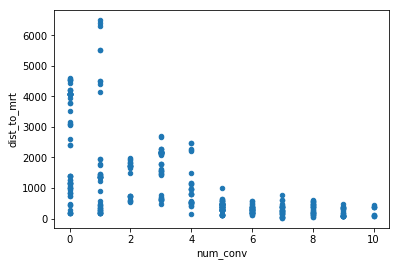

Correlation coefficent =  -0.6025191447226249


In [24]:
conv_mrt_corr = np.corrcoef(df['num_conv'],df['dist_to_mrt'])
df.plot.scatter(y= 'dist_to_mrt',
                    x= 'num_conv')
plt.show()
print('Correlation coefficent = ',conv_mrt_corr[0][1])

house_age


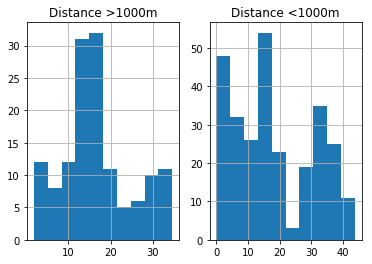

dist_to_mrt


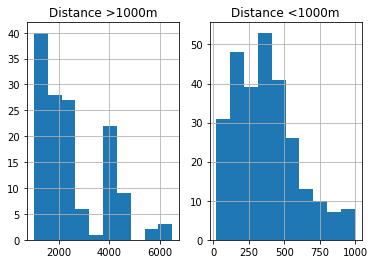

num_conv


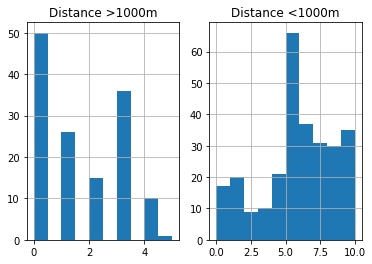

price_per_unit


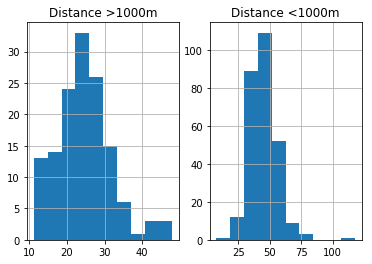

Correlation


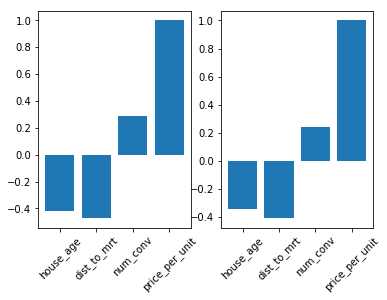

Correlation coefficient with price per unit area
house_age        -0.338204
dist_to_mrt      -0.405589
num_conv          0.241835
price_per_unit    1.000000
Name: price_per_unit, dtype: float64


<Figure size 432x288 with 0 Axes>

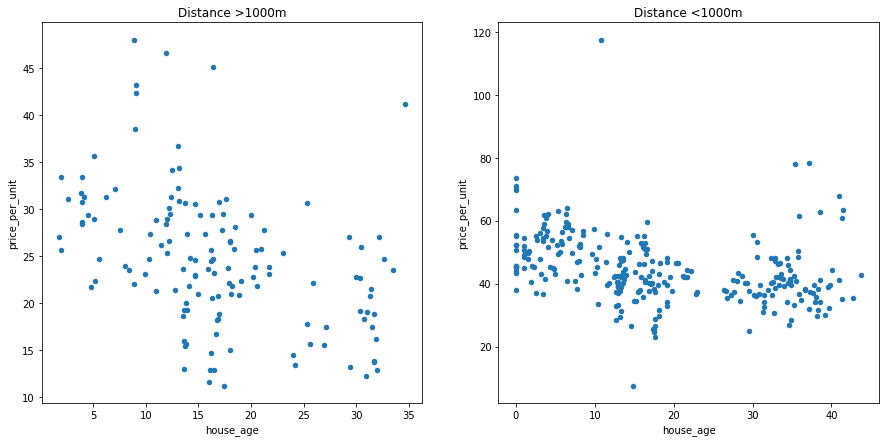

<Figure size 432x288 with 0 Axes>

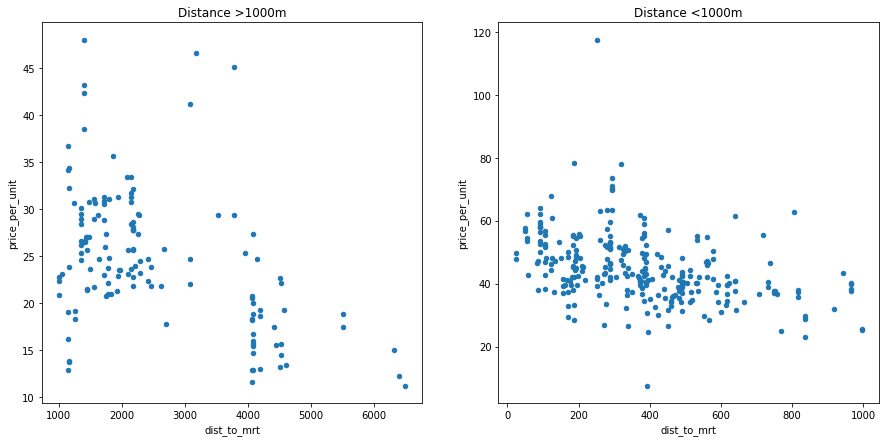

<Figure size 432x288 with 0 Axes>

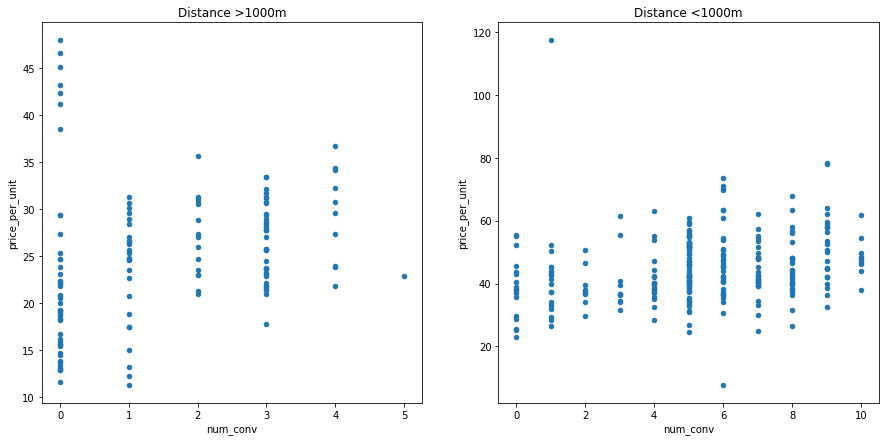

<Figure size 432x288 with 0 Axes>

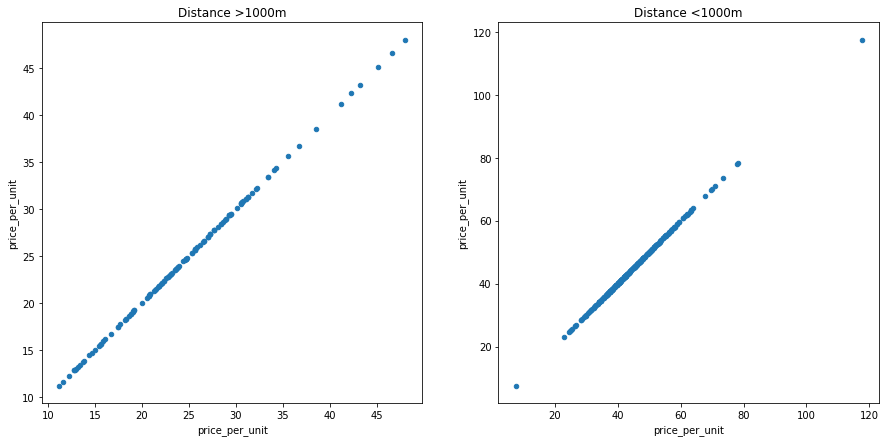

In [75]:
dist = 1000
tf = df.drop(['trans_date','latitude','longtidue'],axis=1)
tf1 = tf[tf['dist_to_mrt'] > dist]
tf2 = tf[tf['dist_to_mrt'] < dist]

for i, column in enumerate(tf.columns):
    print(column)
    plt.figure()
    
    plt.subplot(1,2,1)
    tf1[column].hist()
    figtitle = 'Distance >' + str(dist) + 'm'
    plt.title(figtitle)
    
    plt.subplot(1,2,2)
    tf2[column].hist()
    figtitle = 'Distance <' + str(dist) + 'm'
    plt.title(figtitle)
    plt.show()
    

print('Correlation')
plt.figure()

plt.subplot(1,2,1)
corr = tf1.corr()['price_per_unit']
plt.bar(tf.columns,corr)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
corr = tf2.corr()['price_per_unit']
plt.bar(tf.columns,corr)
plt.xticks(rotation=45)
plt.show()
print('Correlation coefficient with price per unit area')
print(corr)

for column in tf.columns:
      
    plt.figure()
    fig, axes = plt.subplots(1,2)
    tf1.plot.scatter(x= column,
                     y= 'price_per_unit',
                     ax = axes[0])
    figtitle = 'Distance >' + str(dist) + 'm'
    axes[0].set_title(figtitle)
    
    tf2.plot.scatter(x= column,
                     y= 'price_per_unit',
                     ax = axes[1])
    figtitle = 'Distance <' + str(dist) + 'm'
    axes[1].set_title(figtitle)
    
    fig.set_figheight(7)
    fig.set_figwidth(15)
    plt.show()
    

In [ ]:
tf = df[df['house_age'] > 25]

for i, column in enumerate(tf.columns):
    plt.figure()
    tf[column].hist()
    plt.title(column)

corr = tf.corr()['price_per_unit']
plt.figure()
plt.bar(tf.columns,corr)
plt.xticks(rotation=45)
plt.show()
print('Correlation coefficient with price per unit area')
print(corr)

for i, column in enumerate(tf.columns):
    plt.figure()
    tf.plot.scatter(x= column,
                    y= 'price_per_unit')

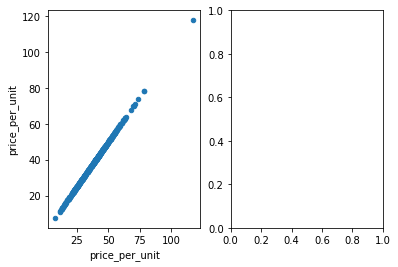

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2)
tf.plot.scatter(x= column,
                y= 'price_per_unit', ax=axes[0])

In [ ]:
conv_mrt_corr = np.corrcoef(df['num_conv'],df['dist_to_mrt'])
df.plot.scatter(x= 'dist_to_mrt',
                    y= 'num_conv')
plt.show()
print('Correlation coefficent = ',conv_mrt_corr[0][1])

In [69]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002ED08B61828>,
      dtype=object)